<font size=6><b> Lec03. 딥러닝 기초(이미지)

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# Data Load

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train[:1], X_train[:1].shape, X_train[:1]

(array([5], dtype=uint8),
 (1, 28, 28),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,  18,  18,  18, 126, 

# EDA
* imshow : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

<pre>
* <font color=blue>Z = 픽셀값을 갖는 행렬
  plt.imshow(Z)
  plt.show()

## mnist 

In [6]:
len(X_train[:1])     # [ [[  0,..,28], 
                     #    [  0,..,28],
                     #   ],
                     # ]   

1

In [7]:
len(X_train[0] )     #  [[  0,..,28], 
                     #   [  0,..,28],
                     #  ]

28

In [8]:
len(X_train[0][0] )  #   [  0,..,28]

28

In [9]:
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

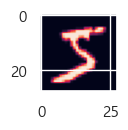

In [10]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[:1][0])
plt.show()

range(0, 30)


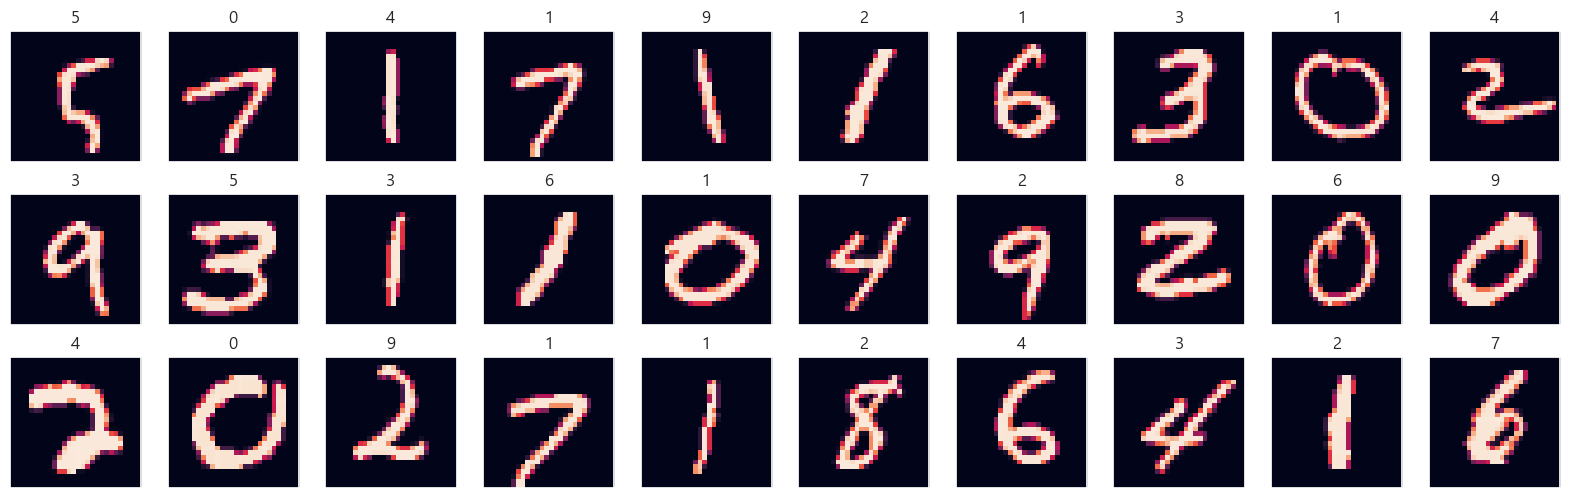

In [11]:
fig, axes = plt.subplots(3,10, figsize=(20,6))
print(range(X_train[:30].shape[0]))
for i, px_arr in enumerate(X_train[100:130]) : 
    row = i // 10
    col = i % 10
    axes[row][col].imshow(px_arr)
    axes[row][col].set_title(y_train[i])
    # Hide axes,grid
    axes[row][col].grid(False)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])
plt.show()

## target 분포도

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


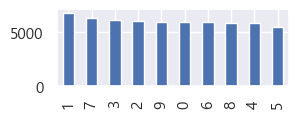

In [12]:
print( pd.Series(y_train).value_counts() )
plt.figure(figsize=(3,1))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.show()

## mnist : 숫자N 이미지

Int64Index([4, 19, 22, 33, 43, 45, 48, 54, 57, 80], dtype='int64')


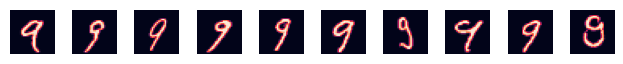

In [13]:
s = pd.Series(y_train)
idx_list =  s[s.values == 9].index[:10] 
print(idx_list)

for i, px_arr in enumerate(X_train[idx_list]):
    plt.subplot(3,10, i+1)
    plt.imshow(px_arr)
    plt.axis('off')
    plt.grid(False)
plt.tight_layout()
plt.show()


In [14]:
s = pd.Series(y_train)
idx_list = []
for N in range(10) :
    idx_list.extend( s[s.values==N].index[:10] )
print( len(idx_list) , idx_list )

100 [1, 21, 34, 37, 51, 56, 63, 68, 69, 75, 3, 6, 8, 14, 23, 24, 40, 59, 67, 70, 5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 7, 10, 12, 27, 30, 44, 49, 50, 74, 86, 2, 9, 20, 26, 53, 58, 60, 61, 64, 89, 0, 11, 35, 47, 65, 100, 132, 138, 145, 173, 13, 18, 32, 36, 39, 62, 66, 73, 83, 90, 15, 29, 38, 42, 52, 71, 79, 84, 91, 96, 17, 31, 41, 46, 55, 85, 94, 97, 125, 137, 4, 19, 22, 33, 43, 45, 48, 54, 57, 80]


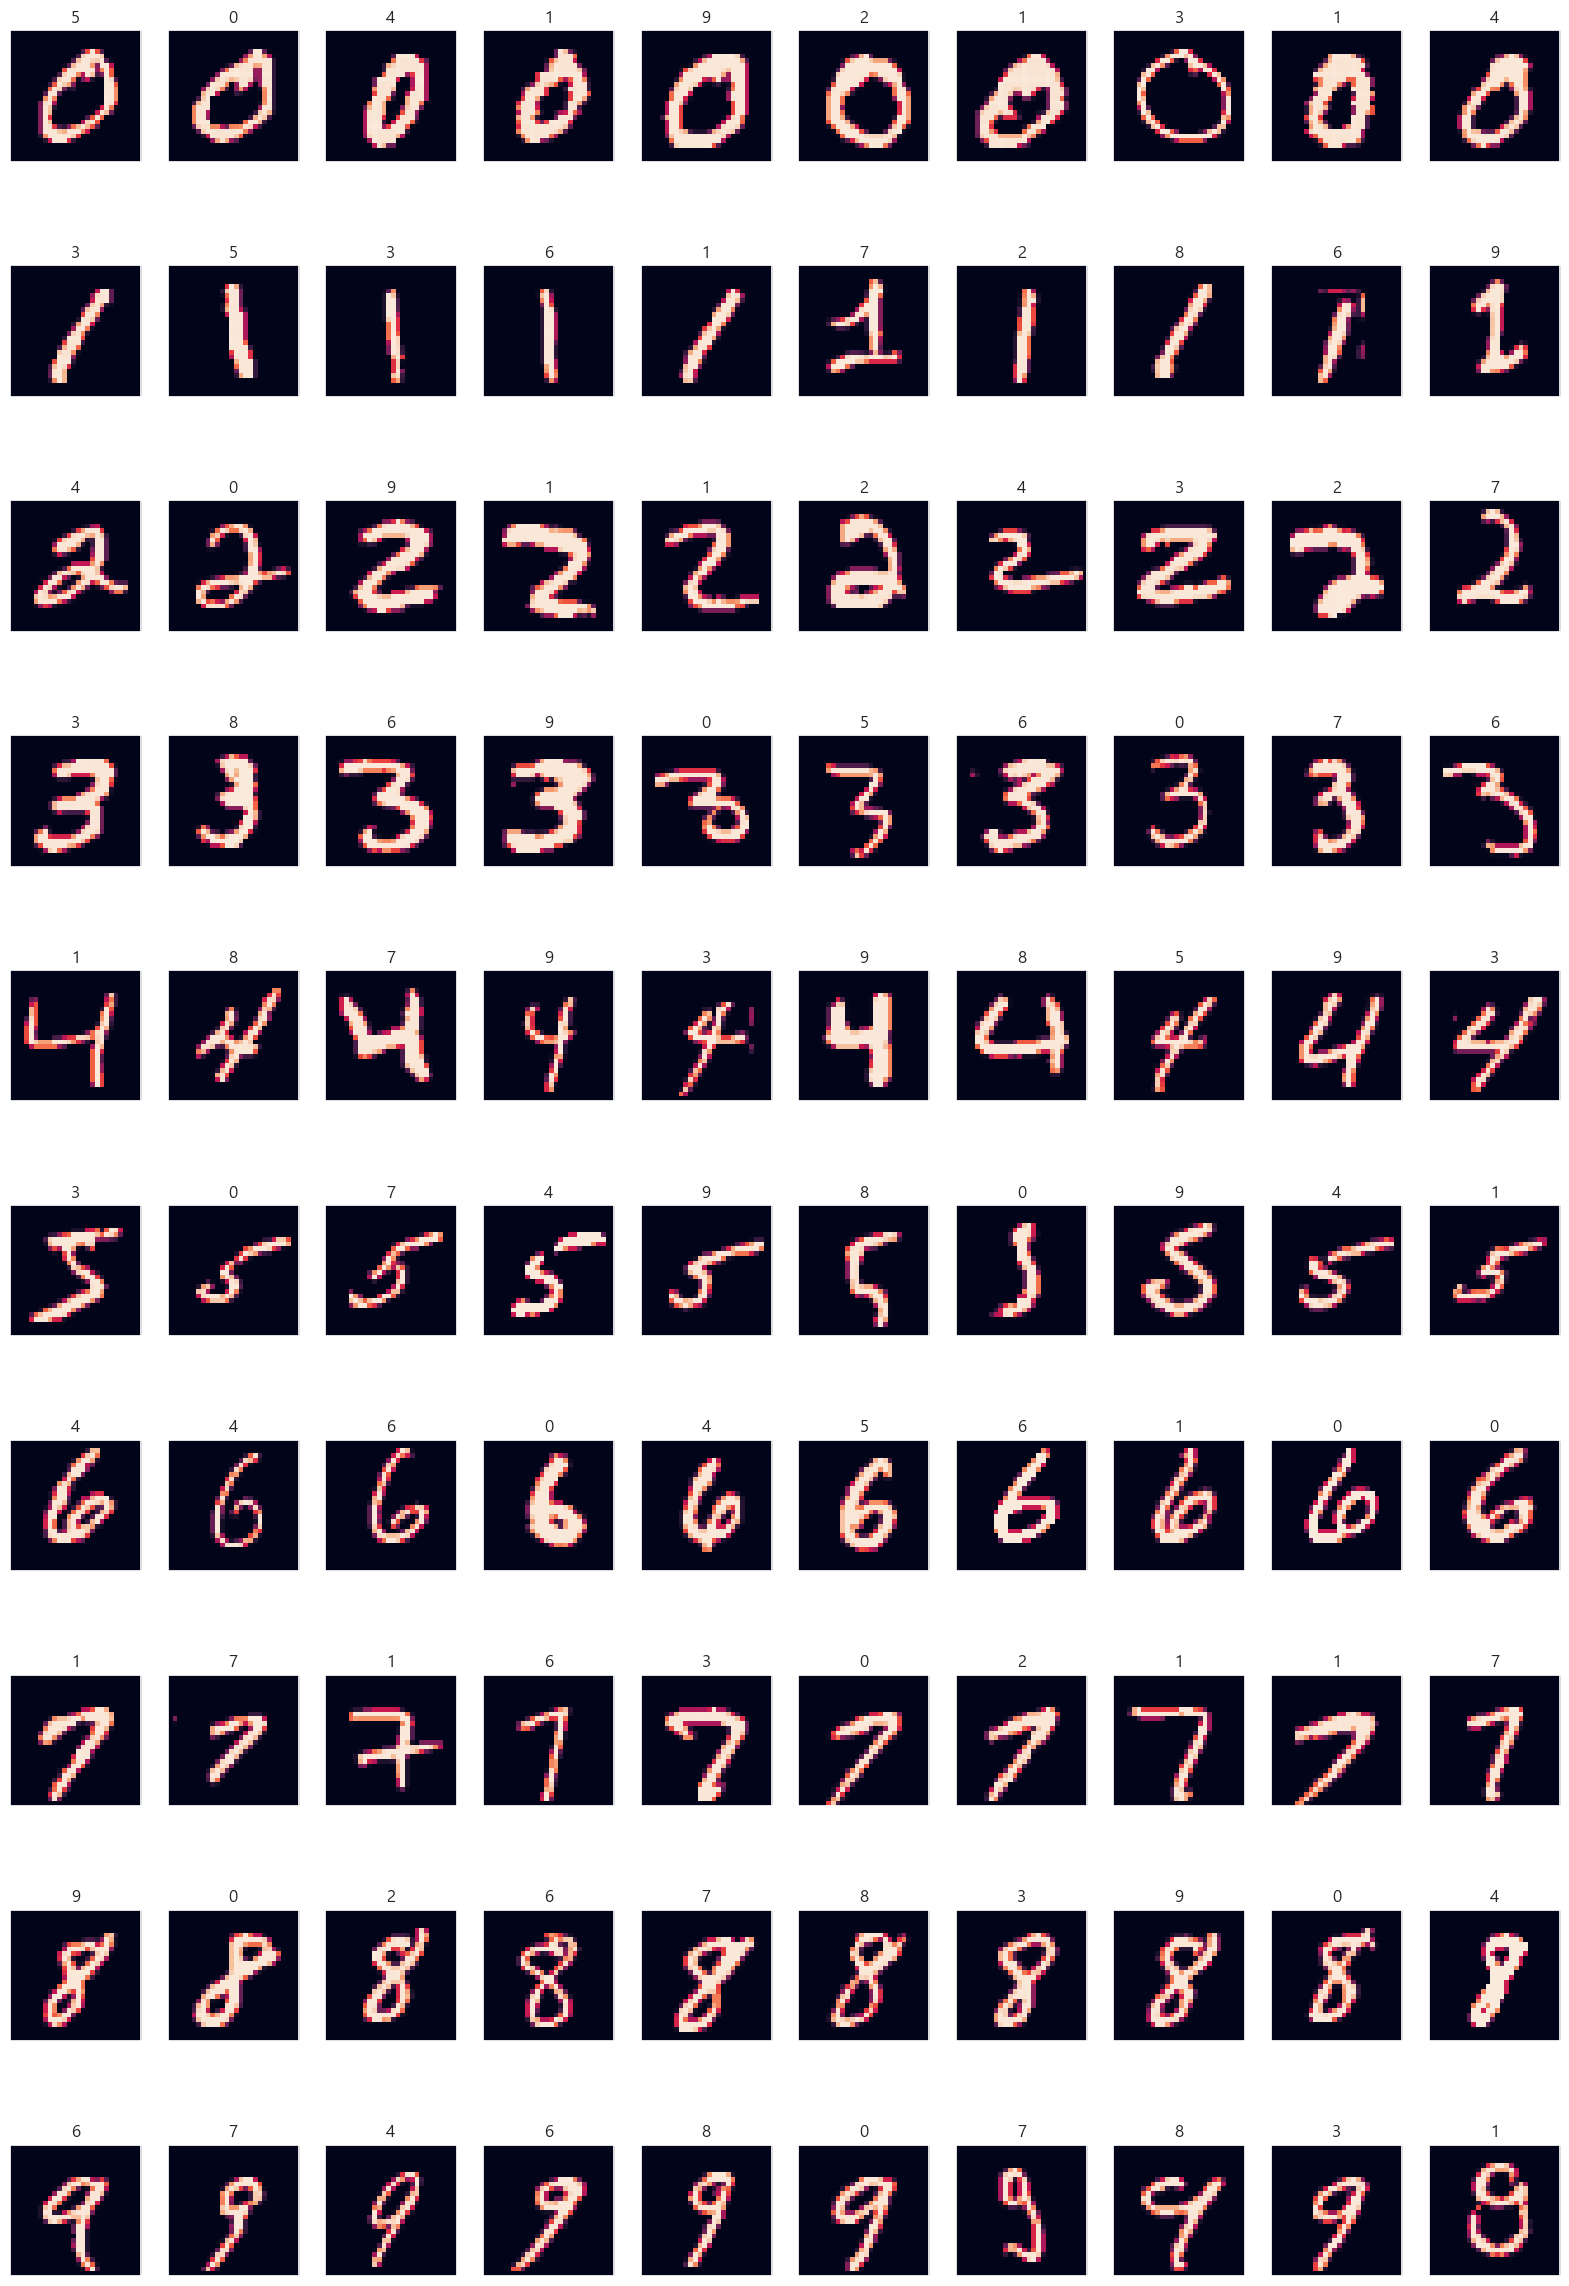

In [15]:
fig, axes = plt.subplots(10,10, figsize=(20,30))
# for i, px_arr in enumerate(X_train[100:130]) :     
for i, px_arr in enumerate(X_train[idx_list]) :
    row = i // 10
    col = i % 10
    axes[row][col].imshow(px_arr)
    axes[row][col].set_title(y_train[i])
    # Hide axes,grid
    axes[row][col].grid(False)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])
plt.show()


# 전처리 & 가공

## Flatten
* 이미지 픽셀 (28*28) : 행렬(2D) --> arr(1D)

### 1장

In [16]:
X_train[0].shape  #[[

(28, 28)

In [17]:
# new_arr = X_train[0].reshape(-1)  # [ 
# new_arr.shape

X_train[0].reshape(-1).shape  # [ 

(784,)

In [18]:
X_train[0].flatten().shape

(784,)

### 60000만장

In [19]:
X_train.shape 

(60000, 28, 28)

In [20]:
X_train.reshape(60000, 784).shape

(60000, 784)

In [21]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [22]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)


## 정규화(픽셀값 스케일링)
* 0 ~ 255 픽셀값을 0 ~1 값으로 변경
* MinMaxScaler()

In [23]:
X_train_scaler = X_train / 255.0
X_test_scaler = X_test / 255.0

## traget 더미화 
* sklearn : OneHotEncoder(), pd.get_dummies()
* keras : utils.to_categorical()
* 0 ~ 9 숫자 : 원핫인코딩 
    * 0 : 1000000000
    * 1 : 0100000000 

In [24]:
from keras.utils import to_categorical
y_train_oh = to_categorical(y_train, num_classes=10, dtype='int')
y_test_oh  = to_categorical(y_test , num_classes=10, dtype='int')

print(y_train[:5])
print(y_train_oh[:5])

[5 0 4 1 9]
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


# 모델

## 모델&학습

In [25]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal  #Xavier

In [26]:
model = Sequential()
model.add(Dense(units=300, input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [27]:
fit_hisroty = model.fit(X_train_scaler, y_train_oh
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test_oh)  )

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3129 - accuracy: 0.9101 - val_loss: 0.1563 - val_accuracy: 0.9540
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1167 - accuracy: 0.9645 - val_loss: 0.0992 - val_accuracy: 0.9693
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0761 - accuracy: 0.9763 - val_loss: 0.1050 - val_accuracy: 0.9706
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.0829 - val_accuracy: 0.9753
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0854 - val_accuracy: 0.9764
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0799 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0970 - val_accuracy: 0.9734
Epoch 

## 평가 시각화

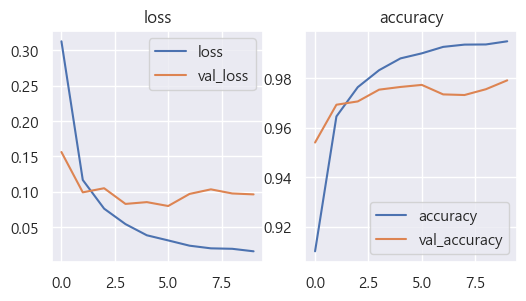

In [28]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 예측

## 예측

## 오답 검증